## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

In [329]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [330]:
nans_1 = X.isnull().sum()
nans_2 = pd.DataFrame(y).isnull().sum()
print((np.sum(np.array(nans_1)) == 0) * 'В Х нет пропусков', (np.sum(np.array(nans_1)) != 0) * 'В Х есть пропуски')
print((np.sum(np.array(nans_2)) == 0) * 'В y нет пропусков', (np.sum(np.array(nans_2)) != 0) * 'В y eсть пропуски')

В Х нет пропусков 
В y нет пропусков 


In [331]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

Категориальных признаков нет

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [332]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=13)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [333]:
normalizer = StandardScaler()
neighbours = [1, 3, 5, 10, 15, 25]
X_train = pd.DataFrame(normalizer.fit_transform(X_train))
X_test = pd.DataFrame(normalizer.fit_transform(X_test))

classifiers = []
for i in range(len(neighbours)):
    clf = KNeighborsClassifier(n_neighbors=neighbours[i]).fit(X_train[[0, 4]], y_train)
    classifiers.append(clf)

accuracies = []  
for i in range(len(classifiers)):
    
    y_predicted_train = classifiers[i].predict(X_train[[0, 4]])
    y_predicted_test = classifiers[i].predict(X_test[[0, 4]])
    accuracies.append([neighbours[i], round(accuracy_score(y_train, y_predicted_train), 2), 
                       round(accuracy_score(y_test, y_predicted_test), 2)])
                                                              
pd.DataFrame(accuracies, columns = ['NN', 'Train', 'Test'])     

,NN,Train,Test
0,1,1.00,0.76
1,3,0.81,0.76
2,5,0.80,0.74
3,10,0.77,0.70
4,15,0.79,0.70
5,25,0.73,0.65


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [334]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [335]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

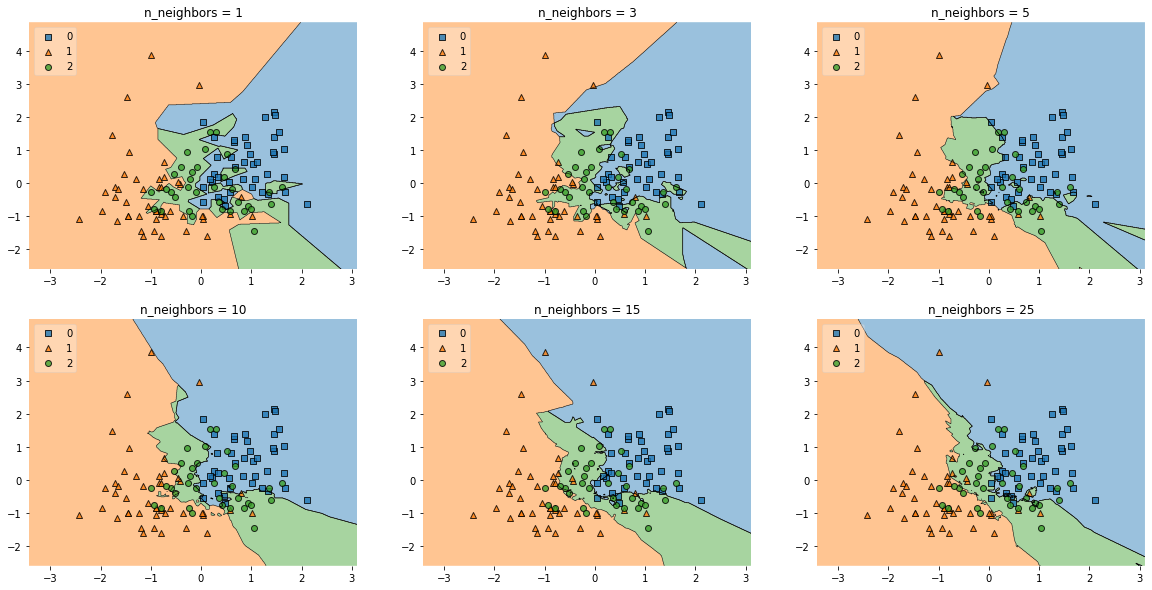

In [336]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20,10))

labels = ['n_neighbors = 1', 'n_neighbors = 3', 'n_neighbors = 5',
          'n_neighbors = 10', 'n_neighbors = 15', 'n_neighbors = 25']

for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(np.array(X_train[[0, 4]]), y_train, clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

В 1.3 самое большое accuracy на обучающей выборке достигается при k=1, что ожидаемо, по мере увеличения k качество предсказания на  обучающей выборке начинает снижаться. Самое большое качество предсказания на тестовой выборке достигается при k=1 и k=3

Что касается 1.5, то видно, что при малых k решающие поверхности очень "негладкие", то есть чуствительны к каждому отдельному расположению объекта. При больших k решающие поверхности выглядят уже более адекватно, вырисовываются четкие классы, несмотря на то, что accuracy на них меньше, чем c малыми k

Наиболее оптимальной на мой вгляд является модель c k=15, так как там адекватное разделение на классы на рещающей поверхности и  наибольший среди "гладких" решающих поверхностей accuracy  



### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

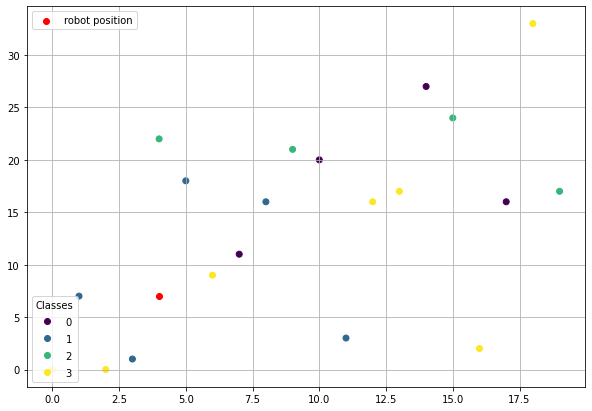

In [337]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [338]:
from sklearn.neighbors import KNeighborsClassifier

In [339]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = initial_position.reshape(1, -1)

        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes)

        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        if np.random.binomial(1, 0.2) == 0:
            
            self.pred = self.knn.predict(self.trajectory[-1].reshape(1, -1))
            self.new = self.trajectory[-1] + self.mapping[self.pred[0]]
            self.trajectory = np.append(self.trajectory, [self.new], axis = 0)
            
        else:
            
            self.new = self.trajectory[-1] + self.mapping[0]
            self.trajectory = np.append(self.trajectory, [self.new], axis = 0)
        

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [340]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()
    _ = plt.title(f"n_neighbours={k}")

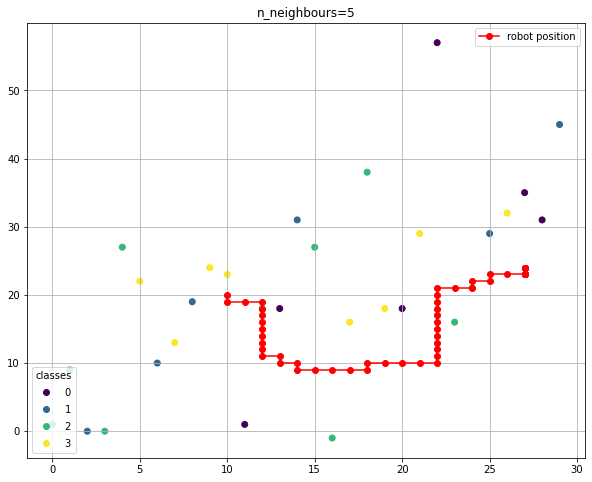

In [341]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

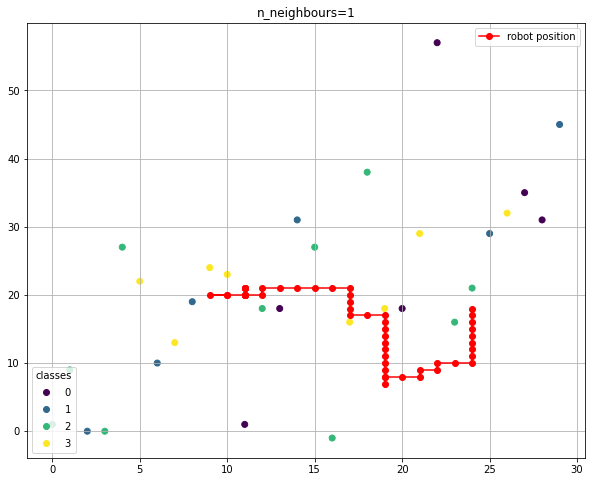

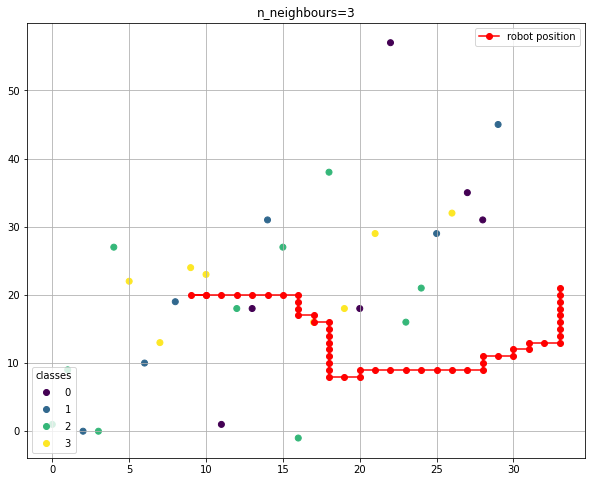

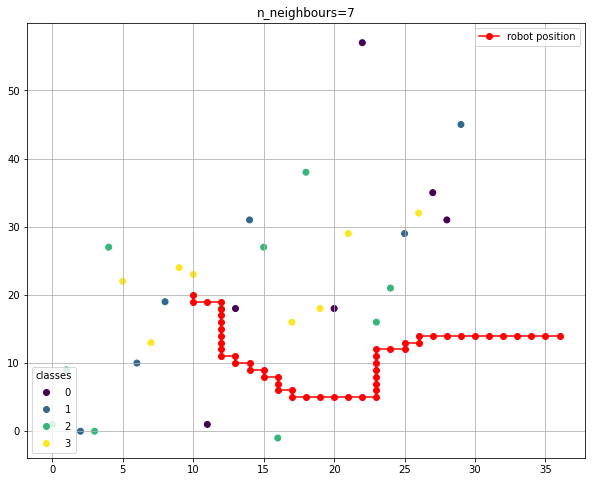

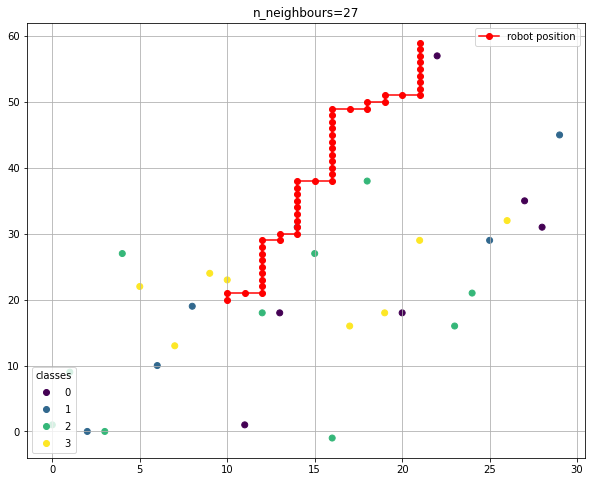

In [342]:
kk = [1, 3, 7, 27]
for i in range(len(kk)):
    conduct_experiment(x, mean = 3, std = 10, k = kk[i], n_movements = 50)

По сути, чем больше число соседей при ограниченном количестве точек различных классов (как у нас), тем более предсказуемым будет движение робота, так как траектория будет выстраиваться от того, какой класс привалирует в распределении с поправкой на случайный шаг вправо с вероятностью 20%. Как мы видим на самом последнем графике, где k = 30, там прослеживается четкое движение вверх (видимо объектов 2 класса большинство) и периодический случайный сдвиг вправо

Если бы мы назначали классы осмыслено, то могли бы задавать с точностью 0.8 движение робота

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [343]:
data = pd.read_csv('diamonds.csv', index_col=0)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [344]:
nans = data.isnull().sum()
print((np.sum(np.array(nans)) == 0) * 'нет пропусков', (np.sum(np.array(nans)) != 0) * 'есть пропуски')


нет пропусков 


можно чуть внимательнее посмотреть на данные

In [345]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


x,y,z - это измерения бриллианта, и так как мы живем в 3D 🥲, они не могут быть нулевыми, значит это пропущенные значения, которые следует удалить 

In [346]:
data = data[(data.x != 0) & (data.y != 0) & (data.z != 0)]
data.shape

(53920, 10)

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

Все признаки по описанию на kaggle полезны и нужны, не будем удалять 

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [347]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


больше всего с ценой коррелирует carat, а также x, y, z - измерения бриллианта

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

Вообще кажется, что cut лучше закодировать в шкалу, так как там прослеживается явная упорядоченность качества, но сделаем как просят в задании

In [348]:
y = data['price']
X = data.drop(['price'], axis=1)
X = pd.get_dummies(X, drop_first=True)
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=13)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [350]:
normalizer = StandardScaler()
 
X_train = pd.DataFrame(normalizer.fit_transform(X_train))
X_test = pd.DataFrame(normalizer.fit_transform(X_test))

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [351]:
lin_reg = LinearRegression().fit(X_train,y_train)

print("Ошибка на тренировочной: {}".format(mean_squared_error(y_train, lin_reg.predict(X_train))))
print("Ошибка на тестовой: {}".format(mean_squared_error(y_test, lin_reg.predict(X_test))))

Ошибка на тренировочной: 1264471.3522356173
Ошибка на тестовой: 1797351.342489083


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [352]:
pd.DataFrame(lin_reg.coef_, index = X.columns.values.tolist(), columns = ['coef'])


,coef
carat,5451.934360
depth,52.137591
table,-54.847529
x,-1866.761077
y,1780.761999
z,-1208.339704
cut_Good,130.923094
cut_Ideal,358.820485
cut_Premium,310.694172
cut_Very Good,251.123269


Carat, x, y, clarity_VS2, clarity_VS1 имеют наиболее большие по модулю коэффициенты 

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [353]:
lasso_reg = Lasso(10).fit(X_train,y_train)
ridge_reg = Ridge(10).fit(X_train,y_train)

coef = pd.concat([pd.DataFrame(lasso_reg.coef_, columns = ['coef_lasso']),
                  pd.DataFrame(ridge_reg.coef_, columns = ['coef_ridge']),
                  pd.DataFrame(lin_reg.coef_, columns = ['coef_lin'])]
                       ,axis = 1)
coef['variable'] = X.columns.values.tolist() 
coef.set_index('variable')

,coef_lasso,coef_ridge,coef_lin
variable,,,
carat,4907.696716,5406.226645,5451.934360
depth,-32.260281,38.394910,52.137591
table,-68.832448,-56.040274,-54.847529
x,-187.105229,-1535.925585,-1866.761077
y,-0.000000,1383.401903,1780.761999
z,-598.751542,-1096.270480,-1208.339704
cut_Good,34.669961,138.179146,130.923094
cut_Ideal,194.995916,369.551746,358.820485
cut_Premium,138.784294,315.166561,310.694172


У carat почти не уменьшилось, однако сильно уменьшилось у x, y и значительно у clarity_VS1, clarity_VS2. Значит, проблема мультиколлинеарности имела место

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

Text(0.5, 0, 'alpha')

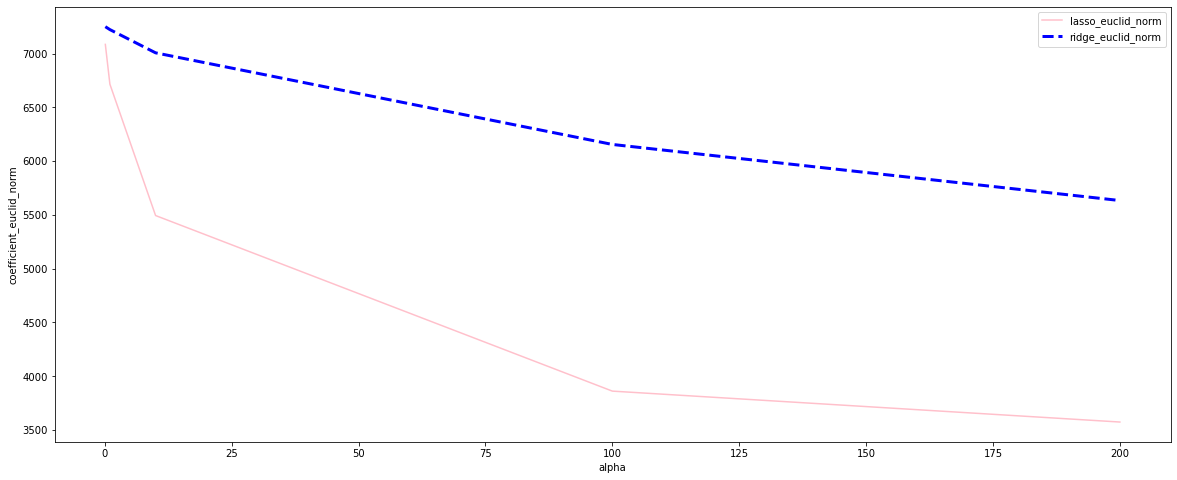

In [354]:
param = [0.1, 1, 10, 100, 200]
coef_param_lasso = []
coef_param_ridge = []

for i in range(len(param)):
    
    coef_param_lasso.append(np.linalg.norm(Lasso(param[i]).fit(X_train,y_train).coef_))
    coef_param_ridge.append(np.linalg.norm(Ridge(param[i]).fit(X_train,y_train).coef_))



fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(param, coef_param_lasso, color='pink', label='lasso_euclid_norm')
ax.plot(param, coef_param_ridge, color='blue', 
         linestyle='dashed', linewidth=3, label='ridge_euclid_norm')


plt.legend(fontsize=10, loc='upper right')
plt.ylabel('coefficient_euclid_norm')
plt.xlabel('alpha')

По графику видно, что Lasso регрессия сильно агрессивнее уменьшаяет веса

При решении задачи минимизации функции потерь получается, что при L1 регуляризации зануляются значения неиформативных коэффициентов, что используется для отбора наиболее значимых признаков

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [355]:
lasso_cv = LassoCV(alphas=param, cv=5)
lasso_cv.fit(X_train, y_train)
alphas = list(lasso_cv.alphas_)
mse = {}

for i in range(len(alphas)):
    mse[lasso_cv.mse_path_[i].mean()] = alphas[i]


print(f"best alpha: {mse[min(mse.keys())]}")


best alpha: 0.1


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [356]:
lasso_reg_best = Lasso(0.1).fit(X_train, y_train)
pd.DataFrame(lasso_reg_best.coef_, index = X.columns.values.tolist(), columns = ['coef'])

,coef
carat,5438.262488
depth,56.994685
table,-56.165521
x,-1477.127102
y,1458.925562
z,-1261.706958
cut_Good,135.415417
cut_Ideal,364.847914
cut_Premium,310.899314
cut_Very Good,259.446057


Получилось, что наиболее значимой оказалось переменная carat, x, y, z, а также dummy переменные clirity 
По-моему достаточно понятно, что carat будет сильно положительно влиять на цену 

Наименее информативными оказались depth и table, что ожидалось еще на моменте корреляции

По ожиданиям регуляризация должна была занулить/сильно занизить x,y,z, потому что они сильно скореллированы с carat и между собой, но этого не случилось

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [357]:
print("Ошибка на тестовой  - Лассо: {}".format(mean_squared_error(y_test, lasso_reg_best.predict(X_test))))
print("Ошибка на тестовой  - Линейная: {}".format(mean_squared_error(y_test, lin_reg.predict(X_test))))

Ошибка на тестовой  - Лассо: 1667313.5875770526
Ошибка на тестовой  - Линейная: 1797351.342489083


Ошибка  Лассо меньше, чем  Линейной модели, поэтому вероятно  лучше использовать для предсказаний Лассо - однако это линейные модели, которые очень неустойчивы к изменениям обучающей/тестовой выборке. Если мы поиграемся только с параметром random state, то уже можем получить противоположный результат, поэтому тут сложно сказать, что лучше